# HDDA. Home Assignment 3

## Obective

Third home assignment is devoted to Factor analysis topic. Factor analysis is a powerful technique for reconstructing a hidden data structure, which in turn is one of the possible tools for identifying of the cluster identities. 

And this means that the model of factor analysis can be used for pattern recognition in general, and image recognition in particular. In this homework, I suggest you consolidate knowledge in the field of factor analysis by applying it to one of the subtasks in the field of face recognition. 

As mentioned in the laboratory session, when trying to use factor analysis as a predictive model, a number of questions arise. 
- Dimension of the matrix defining the data structure (location)
- Estimation of the matrix defining the rotation of the basis of the space of factors (rotation).
- The uniqueness of such a matrix decomposition in terms of the quality measured by some measure chosen for the evaluation of your model.
- Descriptive power of a model

At the same time we have an approach which which helps us in several issues at once - EM algorithm.

So, it looks like you have to use EM algo of FA model applied to face recognition task. Good. I'm happy.

## Plan

Home assignment consists of several parts.

**Demo part**

EM algorithm for clustering for image recognition 

**Derivation of EM for FA (graded part 1)**

This part is first graded part. You have to derive EM steps for FA model and markdown all the formulas.

**Implementation of derived formulas (graded part 2)**

Here I give you a simple template which supposed to help you with organise EM algorithm in several explicit functions. 

**Fit your FA model by using train dataset of images (graded part 3)**

Here you fit you model by using implemented formulas. 


## Grading criteria
The given dataset is separated into three parts
- Train data
- Test data
- Unseen data

In our case private test data is not for medals but for grading of your solution.

## Deadline
06/11/2018 17:20 MSK

## Demo
Thanks to [ipython-notebooks](https://github.com/cubazis/ipython-notebooks/blob/master/EM/brainseg.ipynb) by Riddhish Bhalodia

In [1]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

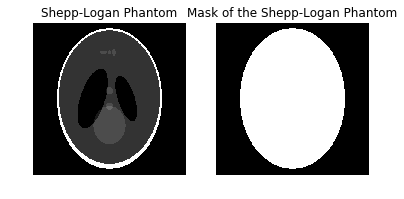

In [2]:
# import the shepp logan phantom
fig, ax = plt.subplots(1,2)
ax[0].imshow(plt.imread('demo/phantom.png'), cmap = 'gray', origin = 'lower')
ax[0].set_title('Shepp-Logan Phantom')
ax[0].set_axis_off()
ax[1].imshow(plt.imread('demo/mask.png'), cmap = 'gray', origin = 'lower')
ax[1].set_title('Mask of the Shepp-Logan Phantom')
ax[1].set_axis_off()

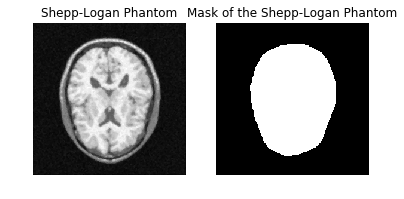

In [3]:
# import the shepp logan phantom
input_phantom = plt.imread('demo/brain.png')
phantom_mask = plt.imread('demo/brain_mask.png')
fig, ax = plt.subplots(1,2)
ax[0].imshow(input_phantom, cmap = 'gray', origin = 'lower')
ax[0].set_title('Shepp-Logan Phantom')
ax[0].set_axis_off()
ax[1].imshow(phantom_mask, cmap = 'gray', origin = 'lower')
ax[1].set_title('Mask of the Shepp-Logan Phantom')
ax[1].set_axis_off()

In [4]:
# Now we will segment this image, as we can see there are four different grayscale intensities
K = 4 # number of clusters
X = input_phantom[phantom_mask == 1]
m = len(X)

In [5]:
# Initialization Part
indices = np.random.permutation(m)
mu = np.zeros(K)
for i in range(K):
    mu[i] = X[indices[i]]
    
sigma = np.ones(K) * np.sqrt(np.var(X));
phi = np.ones(K) * (1.0 / np.double(K));

In [6]:
# Matrix to hold the probability that each data point belongs to each cluster.
# One row per data point, one column per cluster.
W = np.zeros((m, K))
l = np.array([phi, ] * m,dtype=np.float64)

In [7]:
# Expectation maximization

for i in range(1000):
    print('EM iteration', i)
    prevmu = np.zeros(K)
    # E- Step (Expectation)
    pdf = np.zeros((m, K))
    
    # for each cluster evaluate the gaussian points
    for j in range(K):
        pdf[:,j] = (1 / (sigma[j] * np.sqrt(2 * np.pi))) * np.exp(-(X - mu[j])**2 / (2 * sigma[j]**2))
    
    pdf_w = pdf * l
    sm = np.array([np.sum(pdf_w, axis = 1), ] * K, dtype=np.float64).transpose()
    W = pdf_w / sm
    
    # M- Step (Maximization)
    prevmu = np.copy(mu)
    for j in range(K):
        
        # prior probability of the cluster j
        phi[j] = np.mean(W[:, j])
        
        # now compute the weighted average
        mu[j] = np.sum(W[:,j] * X)
        mu[j] = mu[j] / np.sum(W[:,j])
        
        # similarly the sigma
        sigma[j] = np.sum(W[:,j] * (X - mu[j])**2)
        sigma[j] = sigma[j] / np.sum(W[:, j])
        sigma[j] = np.sqrt(sigma[j])
    
    if np.sum(abs(mu  - prevmu)) < 0.001:
        break

EM iteration 0
EM iteration 1
EM iteration 2
EM iteration 3
EM iteration 4
EM iteration 5
EM iteration 6
EM iteration 7
EM iteration 8
EM iteration 9
EM iteration 10
EM iteration 11
EM iteration 12
EM iteration 13
EM iteration 14
EM iteration 15
EM iteration 16
EM iteration 17
EM iteration 18
EM iteration 19
EM iteration 20
EM iteration 21
EM iteration 22
EM iteration 23
EM iteration 24
EM iteration 25
EM iteration 26
EM iteration 27
EM iteration 28
EM iteration 29


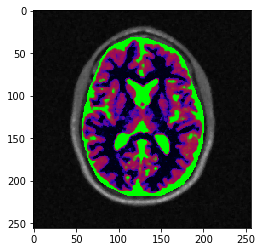

In [8]:
out = np.zeros((input_phantom.shape[0], input_phantom.shape[1], 3))
temp = input_phantom
temp[phantom_mask == 1] = W[:,0]
out[:,:,0] = np.reshape(temp, input_phantom.shape);
temp = input_phantom
temp[phantom_mask == 1] = W[:,1]
out[:,:,1] = np.reshape(temp, input_phantom.shape);
temp = input_phantom
temp[phantom_mask == 1] = W[:,2]
out[:,:,2] = np.reshape(temp, input_phantom.shape);
plt.imshow(out)

## 1. Derivation of EM for FA recognition
### Derive formulas of the model. Use latex notation to note them.

$$PDF(x) = \mathcal{N}(\mu, \ AA^T + \Psi)$$

#### You solution here

## 2. FA recognitor Implementation 
### Implementation of derived formulas

In [ ]:
import numpy as np

In [ ]:
def model_initialization(X, factors):

    return mean, covariance, phi

In [ ]:
def factor_model_pdf(X, covariance, mean):
    
    return pdf

In [ ]:
def e_step(???):
    
    return ???

In [ ]:
def m_step(???):
    
    return ???

## 3. FA recognitor fitting

### 3.1 Dataset

In this work you work with [FDDB](http://vis-www.cs.umass.edu/fddb/).

Dataset have already been prepared for you. Additional context about data preparation [here](http://vis-www.cs.umass.edu/fddb/README.txt).

Detailed image info example:
```
$ identify face/0001.jpg

> face/0001.jpg JPEG 10x10 10x10+0+0 8-bit sRGB 782B 0.000u 0:00.000

```

In [ ]:
# path = "data/face"

import cv2
from os import listdir

def extract(path):
    data = [str(path)+'/'+f for f in listdir(path)]
    res = []
    for p in data:
        image = cv2.imread(p)
        res.append(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).flatten())
    return res

### 3.2 Model Fitting

In [ ]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

In [ ]:
### Set parameters of EM algorithm
factors = ???
iterations = ???


### Use extract function to upload both datasets: FACES, NON_FACES

### Split datasets into train/test

train_faces = ???
train_non_faces = ???
test_faces = ???
test_non_faces = ???

faces_mean, faces_covariance, faces_param = model_initialization(train_faces, factors)
non_faces_mean, non_faces_covariance, non_faces_param = model_initialization(train_non_faces, factors)

print("initial phi", phi)

for i in range(iterations):
    ### Estep for face classifier
    
    ### Mstep for face classifier
    
    ### Estep for non-face classifier
    
    ### Mstep for non-face classifier


positive_likelihood_for_positive_test = factor_model_pdf(test_faces, faces_covariance, faces_mean)
negative_likelihood_for_positive_test = factor_model_pdf(test_faces, non_faces_covariance, non_faces_mean)
positive_likelihood_for_negative_test = factor_model_pdf(test_non_faces, faces_covariance, faces_mean)
negative_likelihood_for_negative_test = factor_model_pdf(test_non_faces, Cov_non, non_faces_mean)

In [ ]:
posterior_classified_face = ???
posterior_classified_non_face = ???
posterior_misclassified_non_face = ???
posterior_misclassified_face = ???


print("correctly classified faces: ", ???)

print("correctly classified non-faces: ", ???) 

print("False Positive Rate ", ???)

print("False Negative Rate ", ???) 

print("Misclassification Rate", ???) 


posterior_classification = np.append(???, ???)
labels = np.append(np.ones(100), np.zeros(100))

fpr, tpr, _ = roc_curve(labels, posterior_classification, pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR" )
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.show()

### Grading part

In [9]:
### MY CODE HERE